# Binary Search  
Binary search is one of the simplest algorithms. It is designed to find a value within a sorted list by cutting the list in half at every iteration until the value has been found. It has a Big O runtime of $O(\log_2{N})$. This means that the worst case number of operations needed to find a value grows at a logarithmic rate. This is compared to a simple search that checks every item in the list until it finds the desired value. It has a Big O runtime of $O(N)$. The simple search operations grow linearly with the amount of items being searched.  

Let's start off by building each algorithm, and then we'll compare search times and plot their runtimes.

## Imports

In [20]:
from math import floor
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np

%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


## Function Creation  
Below I've annotated the binary search function quite a bit to keep track of what's going on. The sorted list is cut in half, and the halfway point is guessed. If the guess is higher than the actual value, the new high value is changed to one less than the mid-point. If the guess is lower, the new low is set to one greater than the mid. This continues until the value is found.  Each iteration halves the list.  

The simple search algorithms iterates through the list until it finds the value. While this is efficient in small lists, as we'll see in the next section, it slows down considerably as the list grows. This is where the binary search algorithm shines.

In [28]:
# Binary Search
def binary_search(sorted_list: List[int], item: int) -> Tuple[int, int]:
    low: int = 0
    high: int = len(sorted_list) - 1
    steps: int = 0
    while low <= high:
        # Cut the list in half
        mid: int = floor((low + high) / 2)
        # Guess the midway point
        guess: int = sorted_list[mid]
        if guess == item:
            steps += 1
            return mid, steps
        # If midway point is higher, make
        # new high one less than mid-point
        elif guess > item:
            steps += 1
            high = mid - 1
        # If midway point lower, make
        # new high one higher than mid-point
        else:
            steps += 1
            low = mid + 1
    return None, None


# Simple Search
def simple_search(sorted_list: List[int], item: int) -> Tuple[int, int]:
    start = 0
    steps = 0
    while sorted_list[start] <= item:
        guess = sorted_list[start]
        if guess == item:
            steps += 1
            return start, steps
        else:
            steps += 1
            start += 1
    return None, None

## Testing the Function  
Let's create a list of 100,000 integers in ascending order (remember binary search requires the values be sorted already). When we run our binary search on the list and set the value to 70,000, we can see that it only takes 16 operations to guess the right value! A comparable simple search would take 70,000 operations as it would have to check all values before! That's a huge time savings!  

Let's quantify the time savings a bit with the `%%timeit` magic function.

In [50]:
# Create list
sl_100k = list(range(1, 100001))

# Run binary search
item_index, steps = binary_search(sl_100k, 70000)

# Output
print("List length = {}".format(len(sl_100k)))
print("Item index = {}".format(item_index))
print("Total steps = {}".format(steps))

List length = 100000
Item index = 69999
Total steps = 16


In [25]:
%%timeit
binary_search(sl_100k, 70000)

4.43 µs ± 36.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [30]:
%%timeit
simple_search(sl_100k, 70000)

10.1 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The `%%timeit` function shows us that the binary search only took on average $4.43\mu s$ as compared to $10.1ms$ for the simple search! Let's do some quick math to quantify that speed up!

In [76]:
print(
    "Simple search is roughly {:.2f} times slower than binary search in this scenario!".format(
        10000 / 4.43
    )
)

Simple search is roughly 2257.34 times slower than binary search in this scenario!


## Big O Evaluation  
If we plot the Big O runtime of each function we can see the smooth logarithmic curve of the binary search growing to roughly 16 operations over our 100k item list. The simple search on the other hand has a linear runtime and our 100k item list has a worst case scenario of 100k operations (assuming the item was the last in the list). The difference doesn't look as drastic because the graphs have different scaled axis. Let's see what this looks like on the same scale.

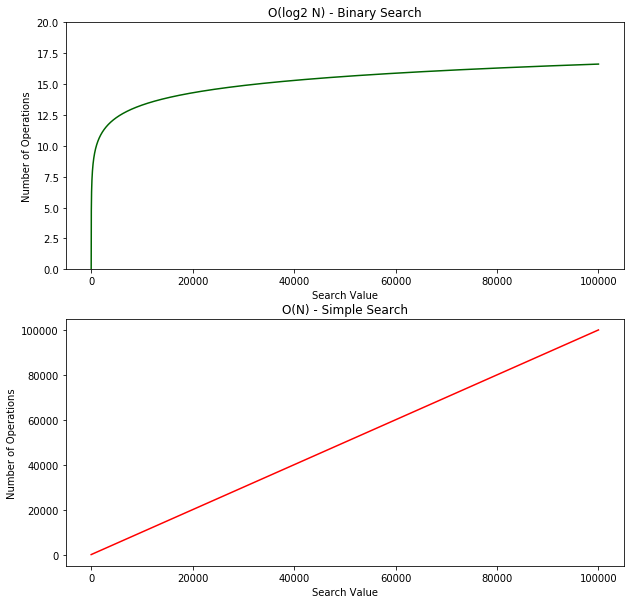

In [72]:
bs = np.log2(np.array(sl_100k))
ss = np.array(sl_100k)

fig, ax = plt.subplots(figsize=(10, 10), nrows=2, ncols=1)

ax[0].plot(bs, color="darkgreen")
ax[0].set_ylim(0, 20)
ax[0].set_title("O(log2 N) - Binary Search")
ax[0].set_ylabel("Number of Operations")
ax[0].set_xlabel("Search Value")

ax[1].plot(ss, color="red")
ax[1].set_title("O(N) - Simple Search")
ax[1].set_ylabel("Number of Operations")
ax[1].set_xlabel("Search Value")

plt.show()

On the same scale, the binary search runtime looks like it's flat along the x-axis. Almost immediately the binary search outperforms the simple search!

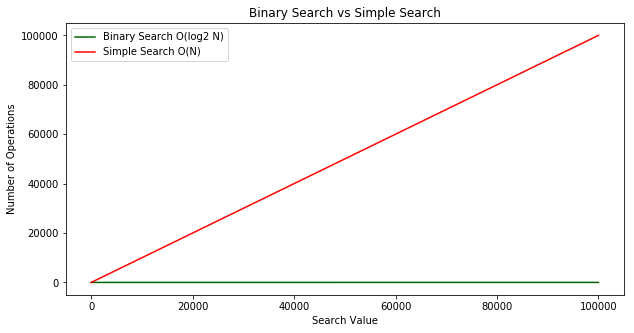

In [74]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(bs, color="darkgreen")
ax.plot(ss, color="red")
ax.set_title("Binary Search vs Simple Search")
ax.set_ylabel("Number of Operations")
ax.set_xlabel("Search Value")
ax.legend(["Binary Search O(log2 N)", "Simple Search O(N)"])

plt.show()

## Recap  
* Binary search is a lot faster than simple search.  
* $O(\log_2 N)$ is faster than $O(N)$, but it gets a lot faster once the list of items you're searching through grows.  
* Algorithm speed isn't measured in seonds.  
* Algorithm times are measured in terms of growth of an algorithm.  
* Algorithm times are written in Big O notation.  

### Reference  
[1] Bhargava, A. Y. (2016). Grokking algorithms: An illustrated guide for programmers and other curious people.